# livelossplot example: extended API

Last update: `livelossplot 0.5.2`. For code and documentation, see [livelossplot GitHub repository](https://github.com/stared/livelossplot).

<a href="https://colab.research.google.com/github/stared/livelossplot/blob/main/examples/minimal.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>

In [ ]:
!pip install livelossplot --quiet

In [17]:
%matplotlib inline

from time import sleep
import numpy as np

from livelossplot import PlotLosses, MainLogger
from livelossplot.outputs import BaseOutput

### How to define groups

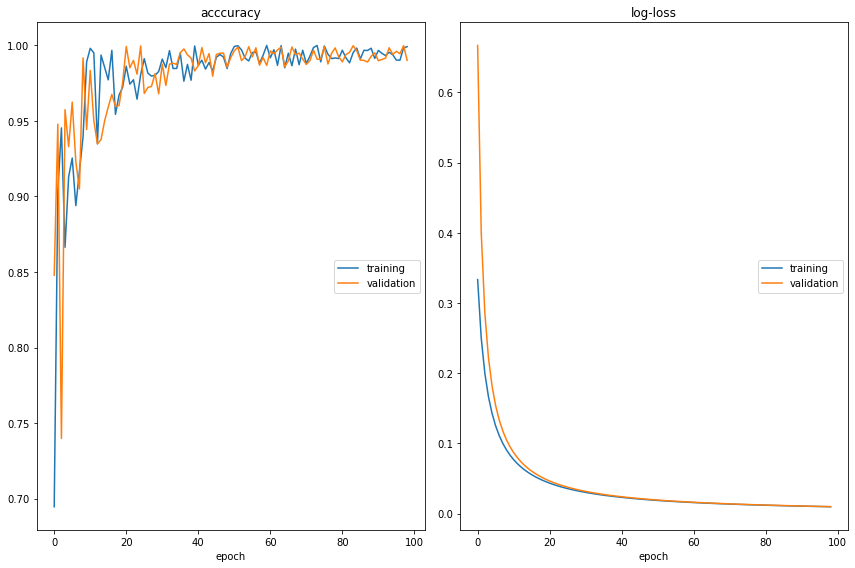

acccuracy
	training         	 (min:    0.695, max:    1.000, cur:    0.999)
	validation       	 (min:    0.740, max:    1.000, cur:    0.990)
log-loss
	training         	 (min:    0.010, max:    0.333, cur:    0.010)
	validation       	 (min:    0.010, max:    0.667, cur:    0.010)


In [18]:
groups = {'acccuracy': ['acc', 'val_acc'], 'log-loss': ['loss', 'val_loss']}
plotlosses = PlotLosses(groups=groups)
for epoch in range(1, 100):
    plotlosses.update({
        'acc': 1 - np.random.rand() / (epoch + 2.),
        'val_acc': 1 - np.random.rand() / (epoch + 0.5),
        'loss': 1. / (epoch + 2.),
        'val_loss': 1. / (epoch + 0.5)
    })
    plotlosses.send()
    sleep(.01)

### How to define groups with regex patterns

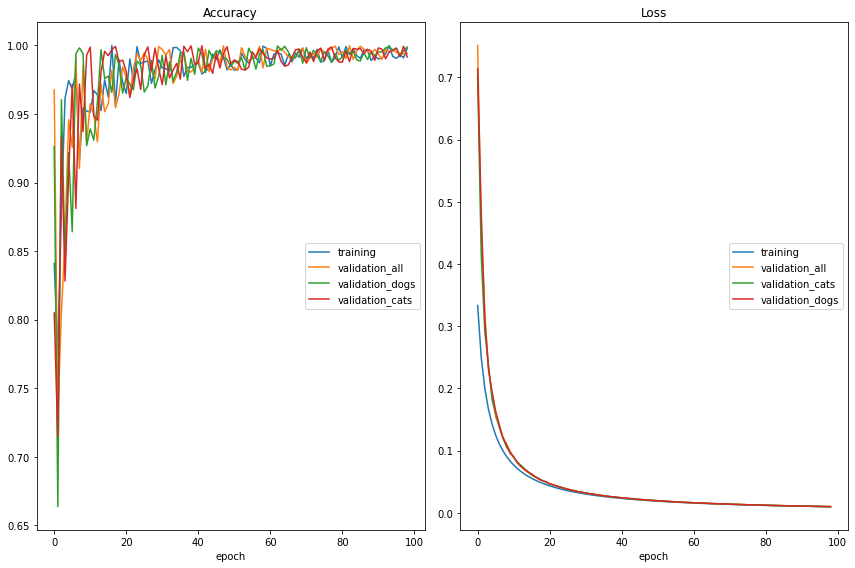

Accuracy
	training         	 (min:    0.775, max:    1.000, cur:    0.998)
	validation_all   	 (min:    0.730, max:    1.000, cur:    0.994)
	validation_dogs  	 (min:    0.664, max:    1.000, cur:    0.999)
	validation_cats  	 (min:    0.715, max:    1.000, cur:    0.992)
Loss
	training         	 (min:    0.010, max:    0.333, cur:    0.010)
	validation_all   	 (min:    0.010, max:    0.751, cur:    0.010)
	validation_cats  	 (min:    0.010, max:    0.704, cur:    0.010)
	validation_dogs  	 (min:    0.010, max:    0.714, cur:    0.010)


In [19]:
group_patterns = [
    (r'^(train(_|-))(.*)', 'training'),
    (r'^(val_cats(_|-))(.*)', 'validation_cats'),
    (r'^(val_dogs(_|-))(.*)', 'validation_dogs'),
    (r'^(val_all(_|-))(.*)', 'validation_all'),
]
plotlosses = PlotLosses(group_patterns=group_patterns)
for epoch in range(1, 100):
    plotlosses.update({
        'train_acc': 1 - np.random.rand() / (epoch + 2.),
        'val_all_acc': 1 - np.random.rand() / (epoch + 0.5),
        'val_dogs_acc': 1 - np.random.rand() / (epoch + 0.5),
        'val_cats_acc': 1 - np.random.rand() / (epoch + 0.5),
        'train_loss': 1. / (epoch + 2.),
        'val_all_loss': 1. / (epoch + 0.5 * np.random.rand()),
        'val_cats_loss': 1. / (epoch + 0.5 * np.random.rand()),
        'val_dogs_loss': 1. / (epoch + 0.5 * np.random.rand())
    })
    plotlosses.send()
    sleep(.01)

### How to write custom plugin

If you want to create a custom output you have to create class that inherits from the BaseOutput and override `send` method.

In [20]:
class AccuracyPrint(BaseOutput):
    def send(self, logger: MainLogger):
        grouped_log_history = logger.grouped_log_history()
        for group_name, group_logs in grouped_log_history.items():
            for metric_name, logs in group_logs.items():
                vals = [log.value for log in logs]
                if group_name == 'Accuracy':
                    print('{} accuracy: {}'.format(metric_name, sum(vals) / len(vals)))

plotlosses = PlotLosses(outputs=[AccuracyPrint()])
for epoch in range(1, 5):
    plotlosses.update({
        'acc': 1 - np.random.rand() / (epoch + 2.),
        'val_acc': 1 - np.random.rand() / (epoch + 0.5),
        'loss': 1. / (epoch + 2.),
        'val_loss': 1. / (epoch + 0.5)
    })
    plotlosses.send()
    sleep(.01)

training accuracy: 0.7825222766056974
validation accuracy: 0.579172514342329
training accuracy: 0.8900729432701822
validation accuracy: 0.6080767827381713
training accuracy: 0.8626459645554587
validation accuracy: 0.7176364082970258
training accuracy: 0.8809672556107493
validation accuracy: 0.7639963416704895
